Let X1 , X2 ....., Xn be n number of features

z = b0 + b1 + b2

f(z)= e^z/ 1 + e^z 

0<f(z)<1

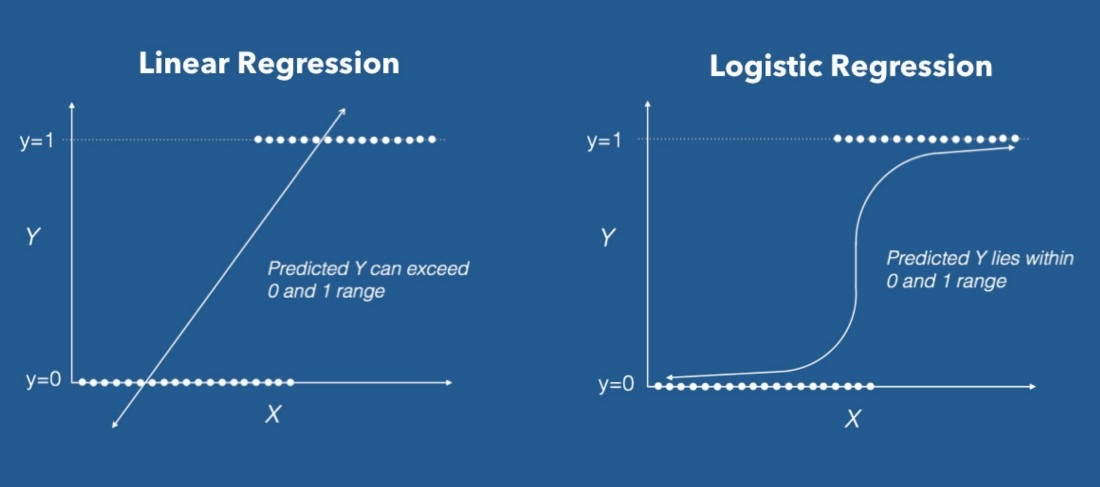


If 0<f(z)<0.5 , it belongs to the class 0
If 0.5<f(z)<1 , z belongs to the class 1

## Logistic regression for german credit problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
gc =  pd.read_csv("https://online.stat.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit/index.csv")

In [4]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
gc.describe() 

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


## Preprocessing the data

In [7]:
y = gc['Creditability'] # Target variable
y.unique()

array([1, 0], dtype=int64)

In [8]:
# Only two classes  -  Binary classification
X = gc.drop(['Creditability'], axis = 1)

In [9]:
X.shape

(1000, 20)

In [10]:
X.columns

Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [12]:
category_cols = ['Account Balance',
       'Payment Status of Previous Credit', 'Purpose',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']
len(category_cols)

17

In [13]:
x_1 = pd.get_dummies(X, columns=category_cols)

In [14]:
x_1.shape

(1000, 71)

In [20]:
x_1= sm.add_constant(x_1)
x_1

,const,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,1.0,18,1049,21,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1.0,9,2799,36,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,1.0,12,841,23,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,1.0,12,2122,39,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,1.0,12,2171,38,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,24,1987,21,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
996,1.0,24,2303,45,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
997,1.0,21,12680,30,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
998,1.0,12,6468,52,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0


## Splitting to train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1,y,test_size=0.2,random_state=10)

In [23]:
X_train_1.shape , X_test_1.shape, y_train_1.shape, y_test_1.shape

((800, 72), (200, 72), (800,), (200,))

## Building the model

In [25]:
logR_1 = sm.Logit(y_train_1,X_train_1) 

In [27]:
logR_1 = logR_1.fit()

         Current function value: 0.434640
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
logR_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Logit
==================================================================================================
Model:                         Logit                       Pseudo R-squared:            0.280     
Dependent Variable:            Creditability               AIC:                         805.4233  
Date:                          2022-10-13 09:30            BIC:                         1063.0770 
No. Observations:              800                         Log-Likelihood:              -347.71   
Df Model:                      54                          LL-Null:                     -482.61   
Df Residuals:                  745                         LLR p-value:                 1.9042e-30
Converged:                     0.0000                      Scale:                       1.0000    
No. Iterations:                35.0000                                                            
--------------------------------------------------------------------------------------------------
                                     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------------------------------
const                                0.4063          nan     nan    nan           nan          nan
Duration of Credit (month)          -0.0245       0.0108 -2.2707 0.0232       -0.0456      -0.0033
Credit Amount                       -0.0001       0.0001 -2.7644 0.0057       -0.0002      -0.0000
Age (years)                          0.0255       0.0111  2.2989 0.0215        0.0038       0.0473
Account Balance_1                   -0.7485          nan     nan    nan           nan          nan
Account Balance_2                   -0.1653          nan     nan    nan           nan          nan
Account Balance_3                    0.1688          nan     nan    nan           nan          nan
Account Balance_4                    1.1513          nan     nan    nan           nan          nan
Payment Status of Previous Credit_0 -0.3046          nan     nan    nan           nan          nan
Payment Status of Previous Credit_1 -0.6436          nan     nan    nan           nan          nan
Payment Status of Previous Credit_2  0.1630          nan     nan    nan           nan          nan
Payment Status of Previous Credit_3  0.1771          nan     nan    nan           nan          nan
Payment Status of Previous Credit_4  1.0145          nan     nan    nan           nan          nan
Purpose_0                           -0.7104          nan     nan    nan           nan          nan
Purpose_1                            0.8887          nan     nan    nan           nan          nan
Purpose_2                            0.0006          nan     nan    nan           nan          nan
Purpose_3                            0.2011          nan     nan    nan           nan          nan
Purpose_4                            0.1495          nan     nan    nan           nan          nan
Purpose_5                           -0.5100          nan     nan    nan           nan          nan
Purpose_6                           -1.0768          nan     nan    nan           nan          nan
Purpose_8                            0.2384          nan     nan    nan           nan          nan
Purpose_9                            0.0760          nan     nan    nan           nan          nan
Purpose_10                           1.1492          nan     nan    nan           nan          nan
Value Savings/Stocks_1              -0.4313          nan     nan    nan           nan          nan
Value Savings/Stocks_2              -0.2359          nan     nan    nan           nan          nan
Value Savings/Stocks_3               0.1928          nan     nan    nan           nan          nan
Value Savings/Stocks_4               0.4554          nan     nan    nan           nan          nan
Value Savings/Stocks_5           

In [29]:
# p value greater than 1

imp_features = ['Duration of Credit (month)','Credit Amount','Age (years)']

In [30]:
x_2 = x_1[imp_features]

In [32]:
x_2

,Duration of Credit (month),Credit Amount,Age (years)
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


## Continue with the revised feature set

In [33]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2,y,test_size=0.2,random_state=10)

In [34]:
X_train_2.shape , X_test_2.shape, y_train_2.shape, y_test_2.shape

((800, 3), (200, 3), (800,), (200,))

In [35]:
# Building the model
logR_2 = sm.Logit(y_train_2,X_train_2) 
logR_2 = logR_2.fit()

Optimization terminated successfully.
         Current function value: 0.574603
         Iterations 5


In [36]:
logR_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.048     
Dependent Variable:    Creditability       AIC:                 925.3648  
Date:                  2022-10-13 09:36    BIC:                 939.4186  
No. Observations:      800                 Log-Likelihood:      -459.68   
Df Model:              2                   LL-Null:             -482.61   
Df Residuals:          797                 LLR p-value:         1.0992e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Duration of Credit (month) -0.0226   0.0078 -2.8827 0.0039 -0.0379 -0.0072
Credit Amount              -0.0001   0.0000 -1.8939 0.0582 -0.0001  0.0000
Age (years)                 0.0452   0.0044 10.2041 0.0000  0.0365  0.0539
==========================================================================

"""